This code was from components page on landlab

In [10]:

import numpy as np
from landlab import imshow_grid #For plotting results; optional
import matplotlib.pyplot as plt #For plotting results; optional
from landlab import RasterModelGrid
from landlab.components import (FlowAccumulator, DepressionFinderAndRouter, Space, FastscapeEroder)
np.random.seed(seed = 5000)

In [11]:
mg = RasterModelGrid((5,5), xy_spacing=10.0)
_ = mg.add_zeros('topographic__elevation', at='node')
mg.at_node['topographic__elevation'] += (mg.node_y / 10. + mg.node_x / 10. + np.random.rand(len(mg.node_y)) / 10.)

mg.set_closed_boundaries_at_grid_edges(bottom_is_closed=True, left_is_closed=True,right_is_closed=True,top_is_closed=True)
mg.set_watershed_boundary_condition_outlet_id(0, mg.at_node['topographic__elevation'], -9999.)
fsc_dt = 100.
space_dt = 100.




In [12]:
fr = FlowAccumulator(mg, flow_director='D8')
df = DepressionFinderAndRouter(mg)
fsc = FastscapeEroder(mg, K_sp = .001, m_sp=.5, n_sp=1)


In [13]:
for x in range(100):
    fr.run_one_step()
    df.map_depressions()
    fsc.run_one_step(dt=fsc_dt)
    mg.at_node['topographic__elevation'][0] -= 0.001 # Uplift


In [14]:
_ = mg.add_zeros('soil__depth', at='node', dtype=float)
mg.at_node['soil__depth'] += 0.5
mg.at_node['topographic__elevation'] += mg.at_node['soil__depth']


In [15]:
ha = Space(mg, K_sed=0.00001,K_br=0.00000000001,F_f=0.5, phi=0.1, H_star=1., v_s=0.001, m_sp=0.5,  n_sp = 1.0, sp_crit_sed=0, sp_crit_br=0)


In [16]:
for x in range(2000): #Space component loop
    fr.run_one_step()
    df.map_depressions()
    ha.run_one_step(dt=space_dt)
    mg.at_node['bedrock__elevation'][0] -= 2e-6 * space_dt

In [17]:
np.around(mg.at_node['soil__depth'], decimals=3) # doctest: +NORMALIZE_WHITESPACE


array([ 0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.495,  0.492,
        0.491,  0.5  ,  0.5  ,  0.492,  0.492,  0.49 ,  0.5  ,  0.5  ,
        0.491,  0.49 ,  0.484,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
        0.5  ])

In [18]:
np.around(mg.at_node['topographic__elevation'], decimals=3) 

array([ 0.423,  1.536,  2.573,  3.511,  4.561,  1.582,  0.424,  0.428,
        0.438,  5.51 ,  2.54 ,  0.428,  0.428,  0.438,  6.526,  3.559,
        0.438,  0.438,  0.45 ,  7.553,  4.559,  5.541,  6.57 ,  7.504,
        8.51 ])

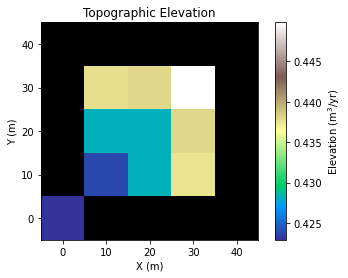

In [19]:
#Instantiate figure
fig = plt.figure()

#Instantiate subplot
plot = plt.subplot()

#Show sediment flux map
imshow_grid(mg, 'topographic__elevation', plot_name='Topographic Elevation', var_name = 'Elevation', var_units=r'm$^3$/yr', grid_units=('m', 'm'), cmap='terrain')